<a href="https://colab.research.google.com/github/almagashi/almagashi.github.io/blob/main/EDA_Amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import pandas as pd

In [234]:
data = pd.read_csv('drive/MyDrive/Data Science Prep/amazon.csv')

What does the data look like?

In [235]:
# columns and data type
data.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [236]:
data.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


After trying to run the code below for cleaning up the data, I noticed that ratings had a non-numerical value, particularly ('|').

In [237]:
data['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

Let's fix that:

In [238]:
# change the '|' to the the actual average rating for the product
data.query("rating == '|'")['product_link'][1279]

'https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295'

In [239]:
data['rating'][1279] = '4.0'

In [240]:
data['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '2', '3', '2.6', '2.9'],
      dtype=object)

In [241]:
# changing the data type for easier calculation
data['category']= data.category.apply(lambda x: x.split('|')[0])
data['actual_price'] = data.actual_price.apply(lambda x: x.replace('₹','').replace(',','')).astype(float)
data['discounted_price'] = data.discounted_price.apply(lambda x: x.replace('₹','').replace(',','')).astype(float)
data['discount_percentage'] = data.discount_percentage.apply(lambda x: x.replace('%','')).astype(float)
data['rating_count'] = data['rating'].astype(float)
data['rating'] = data['rating'].astype(float)

In [242]:
# peak at the data
data.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,4.2,4.2,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,4.0,4.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,3.9,3.9,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [243]:
# group data based on category
grouped_data = data.groupby('category')

In [244]:
# get all categories
all_groups = list(grouped_data.groups.keys())
all_groups

['Car&Motorbike',
 'Computers&Accessories',
 'Electronics',
 'Health&PersonalCare',
 'Home&Kitchen',
 'HomeImprovement',
 'MusicalInstruments',
 'OfficeProducts',
 'Toys&Games']

In [245]:
# how many data in each category?
for elem in all_groups:
  print(len(grouped_data.get_group(elem)), '|', elem)

1 | Car&Motorbike
453 | Computers&Accessories
526 | Electronics
1 | Health&PersonalCare
448 | Home&Kitchen
2 | HomeImprovement
2 | MusicalInstruments
31 | OfficeProducts
1 | Toys&Games


In [246]:
# focus on categories with substantial amount of data
electronics = grouped_data.get_group('Electronics')
comp_accessories = grouped_data.get_group('Computers&Accessories')
home_kitchen = grouped_data.get_group('Home&Kitchen')

In [247]:
electronics.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,Electronics,219.0,700.0,69.0,4.4,4.4,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,Electronics,13999.0,24999.0,44.0,4.2,4.2,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,Electronics,13490.0,21990.0,39.0,4.3,4.3,Resolution: HD Ready (1366x768) | Refresh Rate...,"AHBNKB74LGTYUOKPAJBSKNFV45CA,AFIECTV45ADX5YPTE...","NIRMAL.N,Manoj kumar,SOMNATH DAS,Harsha,Pradhu...","R2PNR69G0BQG2F,R31A0WWDEYMKEW,R2C4XEWFLVU7JV,R...","Sound quality,Very nice,Value for money,Good,G...","LG was always Good , correct delivery, good se...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LG-inches-Ready-Smart-32...
21,B085194JFL,tizum HDMI to VGA Adapter Cable 1080P for Proj...,Electronics,279.0,499.0,44.0,3.7,3.7,Superior Stability: Built-in advanced Certifie...,"AEO5FHWNOSFBT554DKQAG4ICBGFQ,AGIQ5Y7Q4MKZ542KK...","aditya d.,Paranthaman,ashik rahman c,Rajas c.,...","R1GYK05NN6747O,R1J21BZ29NGQF9,R16JCHEILBYOMW,R...","Good product ; Average Finishing,Save it purpo...",This connector has provided as a boon for my o...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Adapter-Projector-Comput...
22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,Electronics,13490.0,22900.0,41.0,4.3,4.3,Resolution: HD Ready (1366x768) | Refresh Rate...,"AHEVO4Q5NM4YXMG2HDDXC5XMBGRQ,AFZPH7ZAWX5VDY3HO...","Rahman Ali,MARIYA DASS,Md Aftab,roshan s.,Moha...","R1SN0D4DFBKAZI,R1SX5L77L2CD6V,R1NAZ6M4QBUJMK,R...","Good,Sound is very low another brand comparing...","Overall good.,TV picture ok smart betterSound ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Inches-Wondertai...


In [248]:
electronics.agg("mean")

<ipython-input-248-112a6d99fbb7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  electronics.agg("mean")


discounted_price        5965.887833
actual_price           10127.311787
discount_percentage       50.828897
rating                     4.081749
rating_count               4.081749
dtype: float64

In [249]:
electronics.corr()

<ipython-input-249-0c9d3eaf3c11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  electronics.corr()


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.963839,-0.434929,0.212982,0.212982
actual_price,0.963839,1.000000,-0.289993,0.212889,0.212889
discount_percentage,-0.434929,-0.289993,1.000000,-0.178965,-0.178965
rating,0.212982,0.212889,-0.178965,1.000000,1.000000
rating_count,0.212982,0.212889,-0.178965,1.000000,1.000000


(array([  1.,   2.,   8.,  13.,  31.,  78., 158., 173.,  55.,   7.]),
 array([2.8 , 2.99, 3.18, 3.37, 3.56, 3.75, 3.94, 4.13, 4.32, 4.51, 4.7 ]),
 <BarContainer object of 10 artists>)

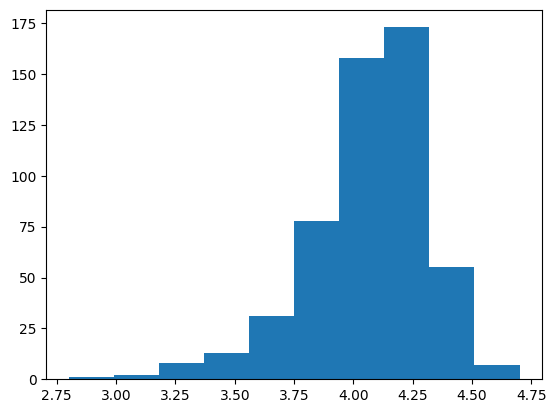

In [250]:
import matplotlib.pyplot as plt

ratings = list(electronics['rating'])

plt.hist(ratings)

(array([398.,  63.,  26.,  18.,  12.,   3.,   3.,   2.,   0.,   1.]),
 array([   79. ,  7870.1, 15661.2, 23452.3, 31243.4, 39034.5, 46825.6,
        54616.7, 62407.8, 70198.9, 77990. ]),
 <BarContainer object of 10 artists>)

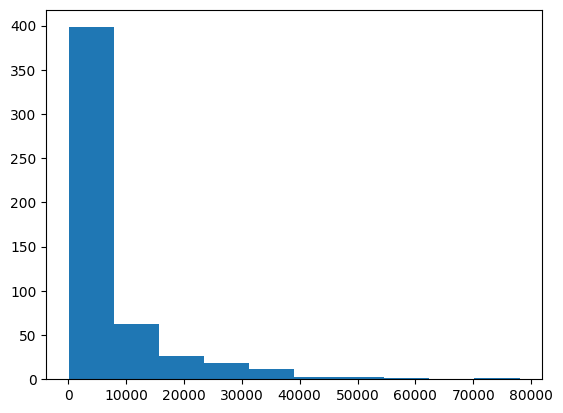

In [251]:
discounted_price = list(electronics['discounted_price'])
plt.hist(discounted_price)

(array([400.,  73.,  25.,  16.,   7.,   3.,   1.,   0.,   0.,   1.]),
 array([   171. ,  14143.9,  28116.8,  42089.7,  56062.6,  70035.5,
         84008.4,  97981.3, 111954.2, 125927.1, 139900. ]),
 <BarContainer object of 10 artists>)

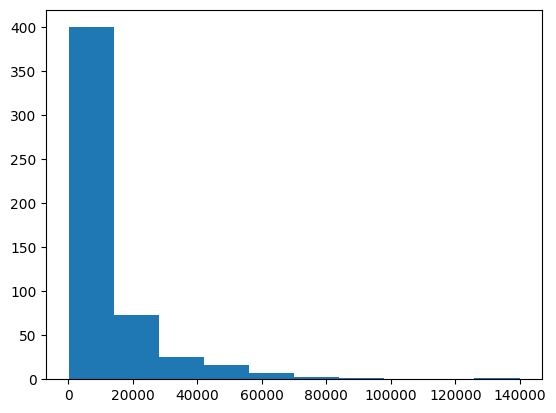

In [252]:
actual_price = list(electronics['actual_price'])
plt.hist(actual_price)

(array([16., 24., 54., 55., 59., 63., 83., 64., 82., 26.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <BarContainer object of 10 artists>)

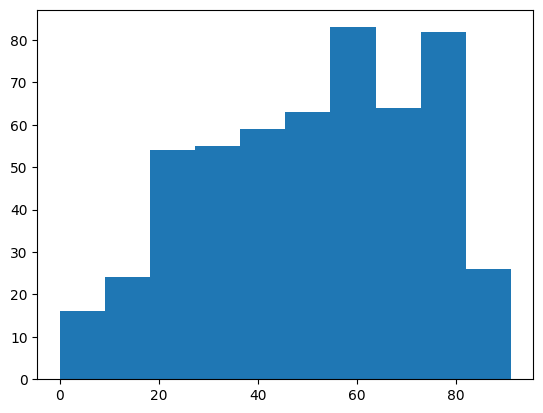

In [253]:
discount_percentage = list(electronics['discount_percentage'])
plt.hist(discount_percentage)

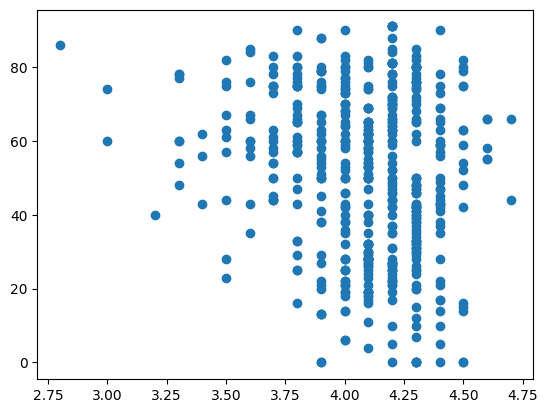

In [254]:
plt.scatter(ratings, discount_percentage)